In [1423]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi
print("Set up")

Set up


In [1424]:
R = 114.6e-3
R_err = 0.5e-3
r = 30.2e-3
r_err = 0.3e-3
m = 956.7e-3
m_err = 0.5e-3
z0 = 2152e-3
z0_err = 1.5e-3
g = 9.8155
g_err = 5e-4

In [1425]:
def compute_k(R, r, m, z0, g):
    return g*r*R/4/pi/pi/z0

In [1426]:
k = compute_k(R, r, m, z0, g)
k

0.00039985449659095325

In [1427]:
k_err = k * (R_err/R + r_err/r + m_err/m + z0_err/z0 + g_err/g)
k_err

6.224683820464228e-06

In [1428]:
m1 = 772.1e-3
m2 = 584.7e-3

In [1429]:
d1 = 158.8e-3
d2 = 170.4e-3
d_err = 0.05e-3

In [1430]:
t0 = 122.622 / 30
t1 = 120.560 / 30
t2 = 110.816 / 30
t3 = 113.214 / 30

In [1431]:
def innertion_momento(t, m):
    return k * m * t ** 2

In [1432]:
I0 = innertion_momento(t0, m)
I0

0.0063910474127391636

In [1433]:
I0_err = I0 * (m_err/m + k_err/k)
I0_err

0.00010283196686122299

In [1434]:
I1 = innertion_momento(t1, m+m1)
I1

0.011163765550375515

In [1435]:
I1_err = I1 * (m_err/m1 + k_err/k)
I1_err

0.0001810199764070392

In [1436]:
I2 = innertion_momento(t2, m+m2)
I2

0.00840968578236444

In [1437]:
I2_err = I2 * (m_err/m2 + k_err/k)
I2_err

0.00013810816318141143

In [1438]:
I3 = innertion_momento(t3, m+m2+m1)
I3

0.013174351557049165

In [1439]:
I3_err = I3 * (m_err/m2 + k_err/k)
I3_err

0.00021635594262817593

In [1440]:
Ic = I1-I0
Ic

0.0047727181376363515

In [1441]:
Ic_err = I1_err + I0_err
Ic_err

0.00028385194326826217

In [1442]:
Id = I2-I0
Id

0.002018638369625277

In [1443]:
Id_err = I2_err + I0_err
Id_err

0.0002409401300426344

In [1444]:
Ict = m1 * (d1/2)**2
Ict

0.0048675963559999995

In [1445]:
Ict_errt = Ict * (2 * d_err / d1 + m_err / m1)
Ict_errt

6.217417e-06

==================================

In [1446]:
Ict_err = 1 - Ic/Ict
Ict_err

0.019491800762546196

In [1447]:
Idt = m2 * (d2/2)**2 / 2
Idt

0.002122180344

In [1448]:
Idt_errt = Idt * (2 * d_err / d2 + m_err / m2)
Idt_errt

3.0601709999999998e-06

=====================================

In [1449]:
Idt_err = 1 - Id / Idt
Idt_err

0.0487903747989491

In [1450]:
I0t = m * R**2/2
I0t

0.006282247085999999

In [1451]:
I0t_err = 1 - I0/I0t
I0t_err

-0.017318695882182933

In [1452]:
Icd = I3 - I0
Icd

0.006783304144310001

In [1453]:
Icd_err = I3_err + I0_err
Icd_err

0.0003191879094893989

In [1454]:
Icdt = Ict + Idt
Icdt

0.006989776699999999

In [1455]:
Icdt_errt = Ict_errt + Idt_errt
Icdt_errt

9.277588e-06

In [1456]:
Icdt_err = 1 - Icd/Icdt
Icdt_err

0.02953922057195313

In [1457]:
Icpd = Ic + Id
Icpd

0.006791356507261629

In [1458]:
Icpd_err = Ic_err + Id_err
Icpd_err

0.0005247920733108966

In [1459]:
1 - Icd/(Ic+Id)

0.0011856781400030325

# ========================

In [1460]:
data1 = pd.read_csv("../data/data1.csv")
data1

,h,t
0,0.0,92.395
1,0.5,93.161
2,1.0,94.038
3,1.5,94.372
4,2.0,96.208
5,2.5,98.146
6,3.0,99.669
7,3.5,102.434
8,4.0,104.254
9,4.5,106.417


In [1461]:
data2 = pd.read_csv("../data/data2.csv")
data2

,h,t
0,0.0,92.433
1,0.5,94.583
2,1.0,97.059
3,1.5,99.721
4,2.0,102.367
5,2.5,106.430
6,3.0,109.910
7,3.5,113.010
8,4.0,116.953
9,4.5,120.367


In [1462]:
data1["h"] = data1["h"]/100
data1["t"] = data1["t"]/30
data1["h2"] = data1["h"]**2
data1["t2"] = data1["t"]**2
data1["h2err"] = 0.001
data1

,h,t,h2,t2,h2err
0,0.000,3.079833,0.000000,9.485373,0.001
1,0.005,3.105367,0.000025,9.643302,0.001
2,0.010,3.134600,0.000100,9.825717,0.001
3,0.015,3.145733,0.000225,9.895638,0.001
4,0.020,3.206933,0.000400,10.284421,0.001
5,0.025,3.271533,0.000625,10.702930,0.001
6,0.030,3.322300,0.000900,11.037677,0.001
7,0.035,3.414467,0.001225,11.658583,0.001
8,0.040,3.475133,0.001600,12.076552,0.001
9,0.045,3.547233,0.002025,12.582864,0.001


In [1463]:
a, b = np.polyfit(data1["h2"], data1["t2"], 1)
a, b

(1525.4849552098378, 9.634683500600385)

In [1464]:
a_err = np.sqrt(1/16*((((data1.t2-data1.t2.mean())**2).mean()) / ((data1.h2-data1.h2.mean())**2).mean()-a**2))
a_err

12.64367815721096

In [1465]:
(m/(1/a/k-1))

1.4962009357526491

In [1466]:
1.5363/(m/(1/a/k-1)) - 1

0.02680058760100934

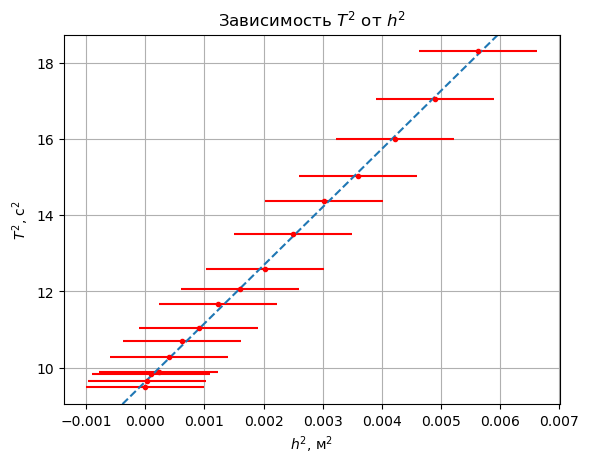

In [1467]:
plt.errorbar(data1["h2"], data1["t2"], xerr=data1["h2err"], fmt='r.')
plt.axline((0, b), (0.005, 0.005 * a + b), linestyle='--')
plt.grid(True)
plt.title("Зависимость $T^2$ от $h^2$")
plt.xlabel("$h^2$, м$^2$")
plt.ylabel("$T^2$, с$^2$")
plt.savefig("../img/cool-plot.png")

In [1468]:
k*(m/(1/a/k-1)+m)*data1.t2[0]-I0

0.0029122396832030667

In [1469]:
d = 0.1256
x = 2 * d / 3 / np.pi

In [1470]:
data2

,h,t
0,0.0,92.433
1,0.5,94.583
2,1.0,97.059
3,1.5,99.721
4,2.0,102.367
5,2.5,106.430
6,3.0,109.910
7,3.5,113.010
8,4.0,116.953
9,4.5,120.367


In [1471]:
data2["h"] /= 100
data2["y2"] = (data2.h+x)**2
data2["t"] /= 30
data2["t2"] = data2.t**2
data2["y2err"] = 0.001
data2

,h,t,y2,t2,y2err
0,0.000,3.081100,0.000710,9.493177,0.001
1,0.005,3.152767,0.001002,9.939938,0.001
2,0.010,3.235300,0.001343,10.467166,0.001
3,0.015,3.324033,0.001735,11.049198,0.001
4,0.020,3.412233,0.002177,11.643336,0.001
5,0.025,3.547667,0.002668,12.585939,0.001
6,0.030,3.663667,0.003210,13.422453,0.001
7,0.035,3.767000,0.003801,14.190289,0.001
8,0.040,3.898433,0.004443,15.197782,0.001
9,0.045,4.012233,0.005134,16.098016,0.001


In [1472]:
a, b = np.polyfit(data2["y2"], data2["t2"], 1)
a, b

(1531.8823798632232, 8.415161619937768)

In [1473]:
a_err = np.sqrt(1/13*((((data2.t2-data2.t2.mean())**2).mean()) / ((data2.y2-data2.y2.mean())**2).mean()-a**2))
a_err

16.99800532196931

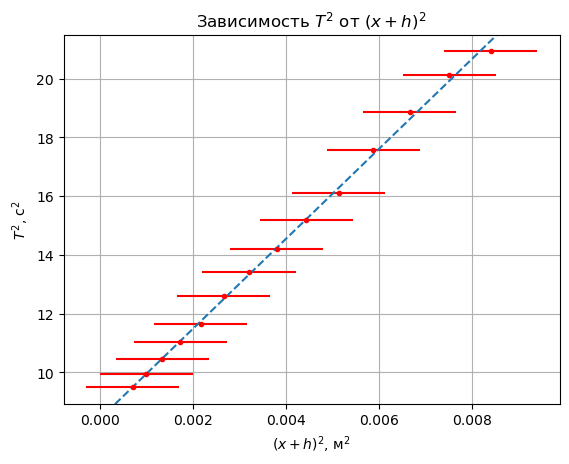

In [1474]:
plt.errorbar(data2["y2"], data2["t2"], xerr=data2["y2err"], fmt='r.')
plt.axline((0.001, 0.001*a+b), (0.005, 0.005 * a + b), linestyle='--')
plt.grid(True)
plt.title("Зависимость $T^2$ от $(x+h)^2$")
plt.xlabel("$(x+h)^2$, м$^2$")
plt.ylabel("$T^2$, с$^2$")
plt.savefig("../img/fucking-plot.png")

In [1475]:
func = lambda h: np.sqrt(1525*(x+h)**2+8.41)*30
func(data2.h)

0      92.433818
1      94.573451
2      97.020047
3      99.751023
4     102.743703
5     105.975919
6     109.426447
7     113.075304
8     116.903919
9     120.895216
10    125.033616
11    129.304997
12    133.696612
13    138.197001
Name: h, dtype: float64

In [1476]:
1525*x**2 - 9.485373

-8.402027811081961

In [1477]:
(m/(1/a/k-1))

1.5123947500566284

In [1478]:
k*(m/(1/a/k-1)+m)*data1.t2[0]-I0

0.002973659083168383